<a href="https://colab.research.google.com/github/Badu1230/Badu1230/blob/main/Rappel_Pandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

In [2]:
# Création d'une Series

series = pd.Series([10, 20, 30, 40], index=["A", "B", "C", "D"])
print(series)

A    10
B    20
C    30
D    40
dtype: int64


In [11]:
import pandas as pd

# Création d'un DataFrame à partir d'un dictionnaire
data = {"Nom": ["Alice", "Bob", "Charlie"], "Âge": [25, 30, 35], "Score": [85.5, 90.0, 88.0]}
df = pd.DataFrame(data)

# Affichage du DataFrame
print(df)

# Exportation du DataFrame vers un fichier CSV
df.to_csv("data.csv", index=False, sep=";")




       Nom  Âge  Score
0    Alice   25   85.5
1      Bob   30   90.0
2  Charlie   35   88.0


In [10]:

# Chargement d'un fichier CSV
df = pd.read_csv("data.csv")
print(df.head())


     Nom;Âge;Score
0    Alice;25;85.5
1      Bob;30;90.0
2  Charlie;35;88.0


In [22]:
# Affiche aléatoirement des listes
print(df.sample())

   Nom  Âge  Score Catégorie  Score_Augmenté
1  Bob   30   90.0         B            99.0


In [14]:
# Sauvegarde d'un DataFrame dans un fichier Excel
df.to_excel("data.xlsx", index=False)


In [25]:
# Sélection des colonnes
ages = df["Âge"]
print(ages)

subset = df[["Nom", "Score"]]
print(subset)

0    25
1    30
2    35
Name: Âge, dtype: int64
       Nom  Score
0    Alice   85.5
1      Bob   90.0
2  Charlie   88.0


In [16]:
# Sélection par ligne
df.loc[1]
df.iloc[0:2]


,Nom,Âge,Score
0,Alice,25,85.5
1,Bob,30,90.0


In [31]:
# Filtrage des données
high_scores = df[df["Score"] > 85] # df les données et (score and greather than 85)
print(high_scores)


       Nom  Âge  Score  Score_Augmenté
0    Alice   25   85.5           94.05
1      Bob   30   90.0           99.00
2  Charlie   35   88.0           96.80


In [28]:
# Ajouter une colonne
df["Catégorie"] = ["A", "B", "A"]
df["Score_Augmenté"] = df["Score"] * 1.1
print(df)

       Nom  Âge  Score  Score_Augmenté Catégorie
0    Alice   25   85.5           94.05         A
1      Bob   30   90.0           99.00         B
2  Charlie   35   88.0           96.80         A


In [29]:
# Supprimer une colonne
df = df.drop("Catégorie", axis=1)
print(df)


       Nom  Âge  Score  Score_Augmenté
0    Alice   25   85.5           94.05
1      Bob   30   90.0           99.00
2  Charlie   35   88.0           96.80


In [30]:
# Résumé statistique
print(df.describe())


        Âge      Score  Score_Augmenté
count   3.0   3.000000        3.000000
mean   30.0  87.833333       96.616667
std     5.0   2.254625        2.480087
min    25.0  85.500000       94.050000
25%    27.5  86.750000       95.425000
50%    30.0  88.000000       96.800000
75%    32.5  89.000000       97.900000
max    35.0  90.000000       99.000000


In [34]:
# Moyenne et médiane
print(df["Score"].mean())


print(df["Âge"].median())




87.83333333333333
30.0


In [41]:
# Ajouter une colonne
df["Catégorie"] = ["A", "B", "A"]
df["Sexe"] = ["F", "M", "F"]
print(df)

       Nom  Âge  Score  Score_Augmenté Catégorie Sexe
0    Alice   25   85.5           94.05         A    F
1      Bob   30   90.0           99.00         B    M
2  Charlie   35   88.0           96.80         A    F


In [44]:
# Regroupe par categorie et score
grouped = df.groupby("Catégorie")["Score"].mean()
print(grouped)

grouped2 = df.groupby("Sexe")['Âge'].mean()
print(grouped2)

Catégorie
A    86.75
B    90.00
Name: Score, dtype: float64
Sexe
F    30.0
M    30.0
Name: Âge, dtype: float64


In [45]:
#Aggregation multiples
aggregated = df.groupby("Catégorie").agg({"Âge": "max", "Score": ["mean", "std"]})
print(aggregated)


          Âge  Score          
          max   mean       std
Catégorie                     
A          35  86.75  1.767767
B          30  90.00       NaN


In [51]:
# Gestion des valeurs manquantes

df.isnull()

df.loc[1,"Âge"] = pd.NA  # il retorne le row et colonne

print(df)


       Nom   Âge  Score  Score_Augmenté Catégorie Sexe
0    Alice  25.0   85.5           94.05         A    F
1      Bob   NaN   90.0           99.00         B    M
2  Charlie  35.0   88.0           96.80         A    F


In [52]:
# Remplacer les valeurs manquantes

df["Âge"] = df["Âge"].fillna(df["Âge"].mean())
print(df)

       Nom   Âge  Score  Score_Augmenté Catégorie Sexe
0    Alice  25.0   85.5           94.05         A    F
1      Bob  30.0   90.0           99.00         B    M
2  Charlie  35.0   88.0           96.80         A    F


In [54]:
# Supprimer les lignes avec valeurs manquantes
df = df.dropna()
print(df)

       Nom   Âge  Score  Score_Augmenté Catégorie Sexe
0    Alice  25.0   85.5           94.05         A    F
1      Bob  30.0   90.0           99.00         B    M
2  Charlie  35.0   88.0           96.80         A    F


In [64]:
# Fusion et jointures

df1 = pd.DataFrame({"ID": [1, 2, 3], "Nom": ["Alice", "Bob", "Charlie"]})
df2 = pd.DataFrame({"ID": [1, 2, 4], "Score": [85, 90, 88]})
print(df1)
print(df2)

merged = pd.merge(df1, df2, on="ID", how="inner")
print(merged)
merged_outer = pd.merge(df1, df2, on="ID", how="outer")
print(merged_outer)

   ID      Nom
0   1    Alice
1   2      Bob
2   3  Charlie
   ID  Score
0   1     85
1   2     90
2   4     88
   ID    Nom  Score
0   1  Alice     85
1   2    Bob     90
   ID      Nom  Score
0   1    Alice   85.0
1   2      Bob   90.0
2   3  Charlie    NaN
3   4      NaN   88.0


In [60]:
# Pivot et tableaux croisés
df = pd.DataFrame({"Nom": ["Alice", "Bob", "Alice", "Bob"], "Jour": ["Lundi", "Lundi",
"Mardi", "Mardi"], "Score": [85, 90, 88, 92]})
pivot_table = df.pivot(index="Nom", columns="Jour", values="Score")
print(df)
print(pivot_table)
cross_tab = pd.crosstab(df["Nom"], df["Jour"]) #compte des occurrences,
print(cross_tab)


     Nom   Jour  Score
0  Alice  Lundi     85
1    Bob  Lundi     90
2  Alice  Mardi     88
3    Bob  Mardi     92
Jour   Lundi  Mardi
Nom                
Alice     85     88
Bob       90     92
Jour   Lundi  Mardi
Nom                
Alice      1      1
Bob        1      1


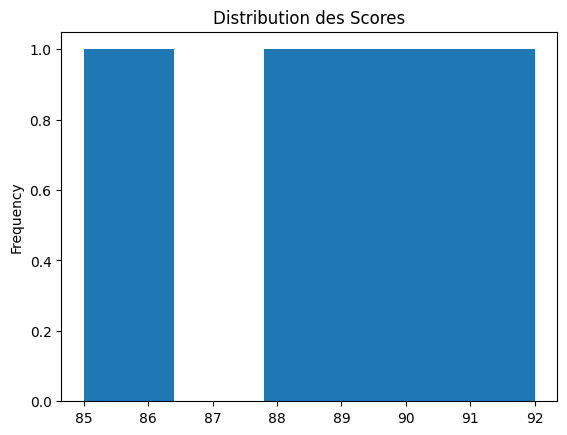

In [61]:
# Visualisation avec pandas
import matplotlib.pyplot as plt
# Histogramme
df["Score"].plot(kind="hist", bins=5, title="Distribution des Scores")
plt.show()

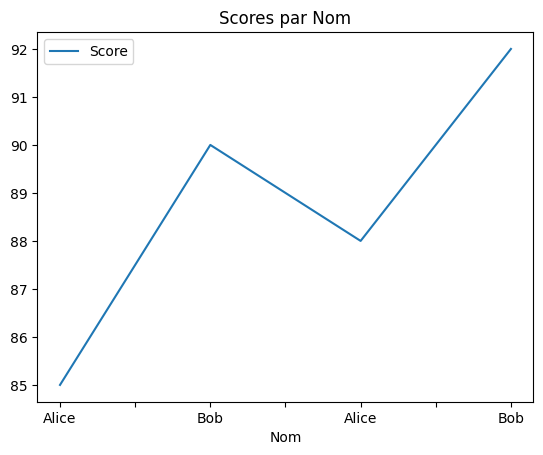

In [62]:
# Graphique linéaire
df.plot(x="Nom", y="Score", kind="line", title="Scores par Nom")
plt.show()